In [ ]:
'''
제작자 : 박지우
'''
#다중선형회귀 and SGD

'\n제작자 : 박지우\n'

In [ ]:
#다중선형회귀

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:

gun_deaths = pd.read_csv('drive/MyDrive/gun_deaths.csv')

gun_deaths.loc[:, 'race'] = gun_deaths['race'].map({'White': 1, 'Black': 2, 'Asian': 3, 'Native American/Native Alaskan': 4, 'Hispanic': 5})
gun_deaths.loc[:, 'intent'] = gun_deaths['intent'].map({'Suicide': 1, 'Undetermined': 2, 'Accidental': 3, 'NA': 4, 'Homicide': 5})
gun_deaths.loc[:, 'place'] = gun_deaths['place'].map({'Home': 1, 'Street': 2, 'Other specified': 3, 'NA': 4, 'Other unspecified': 5, 'Trade/service area': 6, 'Farm': 7})
gun_deaths.loc[:, 'education'] = gun_deaths['education'].map({'BA': 1, 'Less than HS': 2, 'HS/GED': 3, 'Some college': 4})
gun_deaths.loc[:, 'sex'] = gun_deaths['sex'].map({'M': 1, 'F': 2})

<ipython-input-5-e72553e5f430>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  gun_deaths.loc[:, 'race'] = gun_deaths['race'].map({'White': 1, 'Black': 2, 'Asian': 3, 'Native American/Native Alaskan': 4, 'Hispanic': 5})
<ipython-input-5-e72553e5f430>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  gun_deaths.loc[:, 'intent'] = gun_deaths['intent'].map({'Suicide': 1, 'Undetermined': 2, 'Accidental': 3, 'NA': 4, 'Homicide': 5})
<ipython-input-5-e72553e5f430>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

feature = gun_deaths[['race', 'intent', 'place', 'education', 'sex', 'month', 'age']]
feature = feature.fillna(feature.mean())  # 누락된 값은 각 열의 평균 값으로 대체

# 'place' 열의 NaN 값을 중앙값으로 대체
place_median = gun_deaths['place'].median()
gun_deaths['place'].fillna(place_median, inplace=True)

# 다시 학습 데이터와 테스트 데이터로 분할
feature_train, feature_test, Place_train, Place_test = train_test_split(feature, gun_deaths['place'], test_size=0.001, random_state=10)



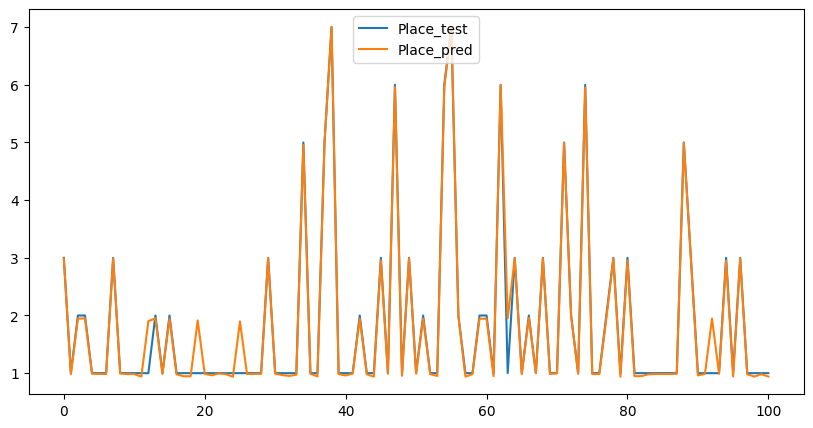

In [ ]:
# 선형 회귀 모델 학습
jiwoo_kl1 = LinearRegression()
jiwoo_kl1.fit(feature_train, Place_train)

# 테스트 데이터에 대한 예측
Place_pred = jiwoo_kl1.predict(feature_test)

Place_test = Place_test.to_numpy()

plt.figure(figsize=(10, 5))
plt.plot(Place_test, label='Place_test')
plt.plot(Place_pred, label='Place_pred')
plt.legend(loc='upper center')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

Place_pred_class = np.round(Place_pred).astype(int)

accuracy = accuracy_score(Place_test, Place_pred_class)

print(f'Accuracy: {accuracy}')

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Place_test, Place_pred)
print(f'Mean Squared Error: {mse}')

Accuracy: 0.9504950495049505
Mean Squared Error: 0.0432100042262762


In [ ]:
#SGD

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
gun_deaths = pd.read_csv('drive/MyDrive/gun_deaths.csv')

race_mapping = {'White': 1, 'Black': 2, 'Asian': 3, 'Native American/Native Alaskan': 4, 'Hispanic': 5}
gun_deaths['race'] = gun_deaths['race'].map(race_mapping)

intent_mapping = {'Suicide': 1, 'Undetermined': 2, 'Accidental': 3, 'NA': 4, 'Homicide': 5}
gun_deaths['intent'] = gun_deaths['intent'].map(intent_mapping)

sex_mapping = {'M': 1, 'F': 2}
gun_deaths['sex'] = gun_deaths['sex'].map(sex_mapping)

place_mapping = {'Home': 1, 'Street': 2, 'Other specified': 3, 'NA': 4, 'Other unspecified': 5, 'Trade/service area': 6, 'Farm': 7}
gun_deaths['place'] = gun_deaths['place'].map(place_mapping)

education_mapping = {'BA':1, 'Less than HS':2, 'HS/GED':3, 'Some college':4}
gun_deaths['education'] = gun_deaths['education'].map(education_mapping)

In [ ]:
feature = gun_deaths.drop(columns=['sex'])
target = gun_deaths['sex']

train_feature, test_feature, train_target, test_target = train_test_split(feature, target, test_size=0.2, shuffle=True)
imputer = SimpleImputer(strategy='mean')

train_feature = imputer.fit_transform(train_feature)
test_feature = imputer.transform(test_feature)

st = StandardScaler()
train_feature = st.fit_transform(train_feature)
test_feature = st.transform(test_feature)

In [ ]:
clf = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, l1_ratio=0.25, tol=1e-4)
clf.fit(train_feature, train_target)

clf_l1 = SGDRegressor(loss='squared_error', penalty='l1', alpha=0.0001, l1_ratio=0.25, tol=1e-4)
clf_l1.fit(train_feature, train_target)


clf_ela = SGDRegressor(loss='huber', penalty='elasticnet', alpha=0.0001, l1_ratio=0.25, tol=1e-4)
clf_ela.fit(train_feature, train_target)

clf_epsilon = SGDRegressor(loss='epsilon_insensitive', penalty='l2', alpha=0.0001, l1_ratio=0.25, tol=1e-4)
clf_epsilon.fit(train_feature, train_target)

print("clf 예측값:", end='')
print(clf.predict([[2012.0 ,1.0 ,0.0 ,34.0, 100.0, 4.0, 0.0,0.0]]))

print("clf_ㅣ1 예측값:", end='')
print(clf_l1.predict([[2012.0 ,1.0 ,0.0 ,34.0, 100.0, 4.0, 0.0, 0.0]]))

print("clf_ela 예측값:", end='')
print(clf_ela.predict([[2012.0 ,1.0 ,0.0 ,34.0, 100.0, 4.0, 0.0,0.0]]))

print("clf_epsilon 예측값:", end='')
print(clf_epsilon.predict([[2012.0 ,1.0 ,0.0 ,34.0, 100.0, 4.0, 0.0,0.0]]))

print("미국에서 총기 사망한 사람들의 성별은?")
clf.predict([ [2012.0 ,1.0 ,0.0 ,34.0, 100.0, 4.0, 0.0,0.0]])

clf 예측값:[-2.23139988]
clf_ㅣ1 예측값:[3.71004316]
clf_ela 예측값:[0.90850732]
clf_epsilon 예측값:[2.4779115]
미국에서 총기 사망한 사람들의 성별은?


array([-2.23139988])

In [ ]:
#모델 평가

from sklearn.metrics import mean_squared_error

# 예측값 계산
predictions = clf.predict(test_feature)
l1_predictions = clf_l1.predict(test_feature)
ela_predictions = clf_ela.predict(test_feature)
epsilon_predictions = clf_epsilon.predict(test_feature)

# 평균 제곱 오차(MSE) 계산
mse = mean_squared_error(test_target, predictions)
l1_mse = mean_squared_error(test_target, l1_predictions)
ela_mse = mean_squared_error(test_target, ela_predictions)
epsilon_mse = mean_squared_error(test_target, epsilon_predictions)


print(f'Mean Squared Error: {mse}')
print(f'Mean Squared Error(l1): {l1_mse}')
print(f'Mean Squared Error(ela): {ela_mse}')
print(f'Mean Squared Error(epsilon): {epsilon_mse}')

Mean Squared Error: 0.12248618788579971
Mean Squared Error(l1): 0.12250377392402256
Mean Squared Error(ela): 0.14037745050641715
Mean Squared Error(epsilon): 0.12606588182364764


In [ ]:
'''
제작자 : 박정원
'''

#Logistic and SVM

'\n제작자 : 박정원\n'

In [ ]:
#Logistic

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [ ]:
data = pd.read_csv('drive/MyDrive/gun_deaths.csv')

In [ ]:
print(float(int(np.mean(data['age']))))

43.0


In [ ]:
data['age'].fillna(value=float(int(np.mean(data['age']))),inplace=True)
data['intent'].fillna(value='Undetermined',inplace=True)
data['place'].fillna(value='Unknown',inplace=True)
data['education'].fillna(value='Unknown',inplace=True)

In [ ]:
data['intent'].fillna(value='Undetermined',inplace=True)
data['place'].fillna(value='Unknown',inplace=True)
data['education'].fillna(value='Unknown',inplace=True)

In [ ]:
data['sex']=data['sex'].map({'M':1,'F':0}).astype(int) #male:0, female:1

data['race']=data['race'].map({'White': 1, 'Black': 2, 'Asian/Pacific Islander': 3, \
                               'Native American/Native Alaskan': 4, 'Hispanic': 5}).astype(int)

data['intent']=data['intent'].map({'Suicide':1,'Undetermined':2, 'Accidental':3, 'Homicide':4})

In [ ]:
features = data[['age']]
target = data['sex']

In [ ]:
train_features,test_features,train_labels,test_labels = train_test_split(features,target,test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
clf = LogisticRegression()
clf.fit(train_features, train_labels)
print(clf.score(train_features, train_labels))
print(clf.score(test_features, test_labels))

0.8580073910563258
0.8512400793650794


In [ ]:
# 총기사고를 당한 사람의 나이를 입력했을 때 남자일지 여자일지
# 0:남자 , 1:여자


person1 = np.array([32])
person2 = np.array([64])
person3 = np.array([55])
person4 = np.array([29])


people = np.array([person1,person2,person3,person4])
people = scaler.transform(people)
print(clf.predict(people))
print(clf.predict_proba(people))

[1 1 1 1]
[[0.14195345 0.85804655]
 [0.14205944 0.85794056]
 [0.14202962 0.85797038]
 [0.14194351 0.85805649]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#모델 평가

from sklearn.metrics import precision_score, recall_score


y_pred = clf.predict(test_features)

print('test label의 precision과 recall')
print()
print('precision : ',end='')
print(precision_score(test_labels,y_pred))
print('recall(micro) : ',end='')
print(recall_score(test_labels, y_pred,average='micro'))
print('recall(macro with error) : ',end='')
print(recall_score(test_labels, y_pred,average='macro'))

#에러로 인한 zero division 사용
print('recall(macro) : ',end='')
print(recall_score(test_labels, y_pred,average='macro',zero_division=1))

print('recall(weighted) : ',end='')
print(recall_score(test_labels, y_pred,average='weighted'))
print()

#precision값이 1이므로 f1사용
from sklearn.metrics import f1_score
print('f1 score : ',end='')
f1_score(test_labels, y_pred, average='weighted')


test label의 precision과 recall

precision : 0.8512400793650794
recall(micro) : 0.8512400793650794
recall(macro with error) : 0.5
recall(macro) : 0.5
recall(weighted) : 0.8512400793650794

f1 score : 

0.7828370623501046

Confusion Matrix:
[[    0  2999]
 [    0 17161]]


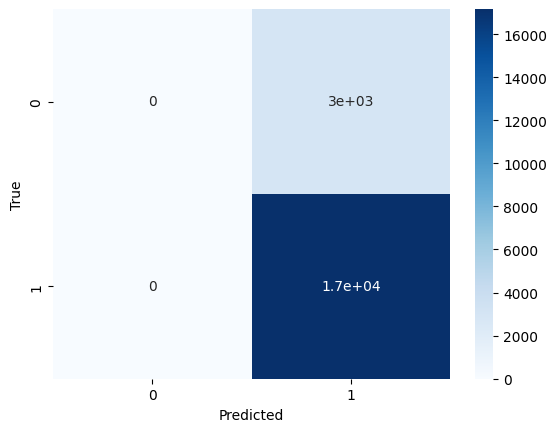

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(test_labels, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# undersampling 방법

In [ ]:
female_data = data[data['sex']==0]
len(female_data)


14449

In [ ]:
male_data = data[data['sex']==1]
male_data.shape[0]

86349

In [ ]:
import random

In [ ]:
# male_data에서 랜덤하게 14449개의 데이터를 선택하기
#비율 계산 (ex> 14449 : X = 3: 7 -> X = 14449*(7/3))
AA = 5 #남성비율
BB=5 #여성비율

male_random_sizes = random.sample(range(male_data.shape[0]), int(len(female_data)*(AA/BB)))
male_random_data = male_data.iloc[male_random_sizes]

# female_data와 male_random_data를 합치기
new_data = pd.concat([female_data, male_random_data])

# 결과 출력
print(f'ratio -> (female){BB} : {AA}(male)')
print(f"male : {new_data[new_data['sex'] == 1].shape[0]}")  # 남성 데이터 수
print(f"female : {new_data[new_data['sex'] == 0].shape[0]}")  # 여성 데이터 수


ratio -> (female)5 : 5(male)
male : 14449
female : 14449


In [ ]:
new_train_features = new_data[['age']]
new_train_labels = new_data['sex']

In [ ]:
new_clf = LogisticRegression()
new_clf.fit(new_train_features, new_train_labels)
print(new_clf.score(new_train_features, new_train_labels))
print(new_clf.score(test_features, test_labels))

0.4811405633607862
0.14875992063492063


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:

# 총기사고를 당한 사람의 나이를 입력했을 때 남자일지 여자일지
# 1:남자 , 0:여자


person1 = np.array([32])
person2 = np.array([64])
person3 = np.array([55])
person4 = np.array([29])


people = np.array([person1,person2,person3,person4])
people = scaler.transform(people)
print(new_clf.predict(people))
print(new_clf.predict_proba(people))

[0 0 0 0]
[[0.50796987 0.49203013]
 [0.50767547 0.49232453]
 [0.50775827 0.49224173]
 [0.50799747 0.49200253]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#모델 평가

from sklearn.metrics import precision_score, recall_score


y_pred = new_clf.predict(test_features)

print('test label의 precision과 recall')
print()
print('precision : ',end='')
print(precision_score(test_labels,y_pred))
print('recall(micro) : ',end='')
print(recall_score(test_labels, y_pred,average='micro'))
print('recall(macro with error) : ',end='')
print(recall_score(test_labels, y_pred,average='macro'))

#에러로 인한 zero division 사용
print('recall(macro) : ',end='')
print(recall_score(test_labels, y_pred,average='macro',zero_division=1))

print('recall(weighted) : ',end='')
print(recall_score(test_labels, y_pred,average='weighted'))
print()

#precision값이 1이므로 f1사용
from sklearn.metrics import f1_score
print('f1 score : ',end='')
f1_score(test_labels, y_pred, average='weighted')


test label의 precision과 recall

precision : 0.0
recall(micro) : 0.14875992063492063
recall(macro with error) : 0.5
recall(macro) : 0.5
recall(weighted) : 0.14875992063492063

f1 score : 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.03852765680591795

Confusion Matrix:
[[ 2999     0]
 [17161     0]]


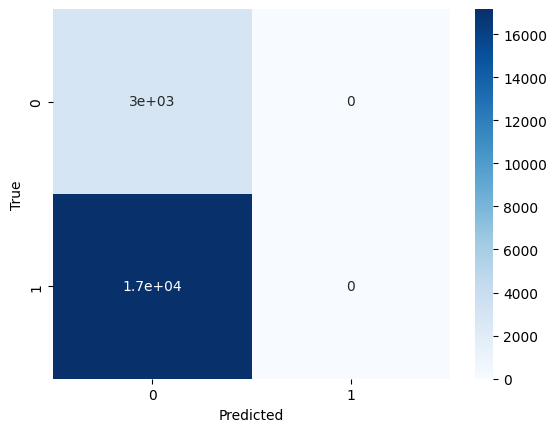

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(test_labels, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#클래스 가중치 변경

In [ ]:
data = pd.read_csv('drive/MyDrive/gun_deaths.csv')

data['age'].fillna(value=float(int(np.mean(data['age']))),inplace=True)
data['intent'].fillna(value='Undetermined',inplace=True)
data['place'].fillna(value='Unknown',inplace=True)
data['education'].fillna(value='Unknown',inplace=True)

data['intent'].fillna(value='Undetermined',inplace=True)
data['place'].fillna(value='Unknown',inplace=True)
data['education'].fillna(value='Unknown',inplace=True)

data['sex']=data['sex'].map({'M':1,'F':0}).astype(int) #male:0, female:1

data['race']=data['race'].map({'White': 1, 'Black': 2, 'Asian/Pacific Islander': 3, \
                               'Native American/Native Alaskan': 4, 'Hispanic': 5}).astype(int)

data['intent']=data['intent'].map({'Suicide':1,'Undetermined':2, 'Accidental':3, 'Homicide':4})

features = data[['age']]
target = data['sex']

train_features,test_features,train_labels,test_labels = train_test_split(features,target,test_size=0.2, shuffle=False)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)


In [ ]:
#클래스 가중치 변경
clf = LogisticRegression(class_weight='balanced')
clf.fit(train_features, train_labels)
print(clf.score(train_features, train_labels))
print(clf.score(test_features, test_labels))

0.5285969394082195
0.5196428571428572


In [ ]:
# 총기사고를 당한 사람의 나이를 입력했을 때 남자일지 여자일지
# 0:남자 , 1:여자


person1 = np.array([32])
person2 = np.array([64])
person3 = np.array([55])
person4 = np.array([29])


people = np.array([person1,person2,person3,person4])
people = scaler.transform(people)
print(clf.predict(people))
print(clf.predict_proba(people))


[1 0 0 1]
[[0.49991367 0.50008633]
 [0.50014716 0.49985284]
 [0.50008149 0.49991851]
 [0.49989178 0.50010822]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#모델 평가

from sklearn.metrics import precision_score, recall_score


y_pred = clf.predict(test_features)

print('test label의 precision과 recall')
print()
print('precision : ',end='')
print(precision_score(test_labels,y_pred))
print('recall(micro) : ',end='')
print(recall_score(test_labels, y_pred,average='micro'))
print('recall(macro with error) : ',end='')
print(recall_score(test_labels, y_pred,average='macro'))

#에러로 인한 zero division 사용
print('recall(macro) : ',end='')
print(recall_score(test_labels, y_pred,average='macro',zero_division=1))

print('recall(weighted) : ',end='')
print(recall_score(test_labels, y_pred,average='weighted'))
print()

#precision값이 1이므로 f1사용
from sklearn.metrics import f1_score
print('f1 score : ',end='')
f1_score(test_labels, y_pred, average='weighted')

test label의 precision과 recall

precision : 0.8573066997992927
recall(micro) : 0.5196428571428572
recall(macro with error) : 0.5124321008348858
recall(macro) : 0.5124321008348858
recall(weighted) : 0.5196428571428572

f1 score : 

0.5881171487254603

Confusion Matrix:
[[1506 1493]
 [8191 8970]]


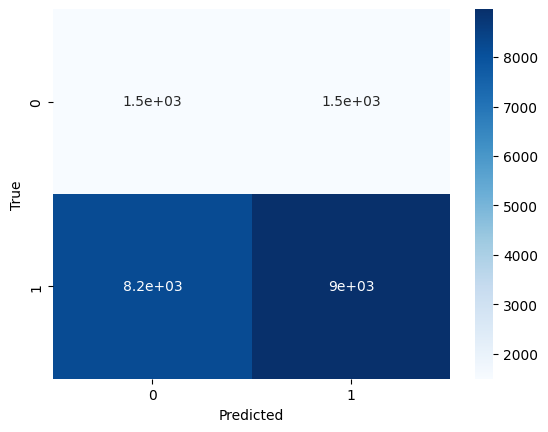

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(test_labels, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
#SVM

In [ ]:
data =pd.read_csv('drive/MyDrive/gun_deaths.csv')

In [ ]:
data['age'].fillna(value=float(int(np.mean(data['age']))),inplace=True)
data['intent'].fillna(value='Undetermined',inplace=True)
data['place'].fillna(value='Unknown',inplace=True)
data['education'].fillna(value='Unknown',inplace=True)

In [ ]:
data['sex']=data['sex'].map({'M':0,'F':1}).astype(int) #남자:0, 여자:1

data['race']=data['race'].map({'White': 1, 'Black': 2, 'Asian/Pacific Islander': 3, \
                               'Native American/Native Alaskan': 4, 'Hispanic': 5}).astype(int)

data['intent']=data['intent'].map({'Suicide':1,'Undetermined':2, 'Accidental':3, 'Homicide':4})

In [ ]:
svm_data = data[['intent','age']]
target = data['sex']

In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(svm_data, target, \
                                                                      test_size=0.2, shuffle=True)

St = StandardScaler()
train_data = St.fit_transform(train_data)
test_data = St.fit_transform(test_data)

In [ ]:
#선형 SVM 사용
import sklearn.svm as svm


clf_linearSVC1 = svm.LinearSVC(C=1.0, max_iter=10000 )
clf_linearSVC1.fit(train_data,train_targets)


LinearSVC(max_iter=10000)

In [ ]:
# model save
#joblib.dump(clf_linearSVC1, 'drive/MyDrive/clf_linearSVC1.pkl')
clf_linearSVC = joblib.load('drive/MyDrive/clf_linearSVC1.pkl')

In [ ]:
print('SVC linearSVC')
print('train data accuracy')
print(clf_linearSVC.score(train_data,train_targets))
print('test data accuracy')
print(clf_linearSVC.score(test_data, test_targets))

y_pred = clf_linearSVC.predict(train_data)
confusion_matrix(train_targets,y_pred)

SVC linearSVC
train data accuracy
0.8558123961407773
test data accuracy
0.8600198412698413


array([[69011,     0],
       [11627,     0]])

In [ ]:
#모델 평가
from sklearn.metrics import precision_score, recall_score


y_pred = clf_linearSVC.predict(test_data)

print('test_targets의 precision과 recall')
print()
print('precision : ',end='')
print(precision_score(test_targets,y_pred))
print('recall(micro) : ',end='')
print(recall_score(test_targets, y_pred,average='micro'))
print('recall(macro with error) : ',end='')
print(recall_score(test_targets, y_pred,average='macro'))

#에러로 인한 zero division 사용
print('recall(macro) : ',end='')
print(recall_score(test_targets, y_pred,average='macro',zero_division=1))

print('recall(weighted) : ',end='')
print(recall_score(test_targets, y_pred,average='weighted'))
print()

#precision값이 0에 가까우므로 f1사용
from sklearn.metrics import f1_score
print('f1 score : ',end='')
f1_score(test_targets, y_pred, average='weighted')



test_targets의 precision과 recall

precision : 0.0
recall(micro) : 0.8600198412698413
recall(macro with error) : 0.5
recall(macro) : 0.5
recall(weighted) : 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8600198412698413

f1 score : 

0.7952970295981924

In [ ]:

clf_kl1 = svm.SVC(kernel='linear', C=1.0)
clf_kl1.fit(train_data,train_targets)


SVC(kernel='linear')

In [ ]:
# model save
#joblib.dump(clf_kl1, 'drive/MyDrive/clf_kl1.pkl')
clf_kl = joblib.load('drive/MyDrive/clf_kl1.pkl')

In [ ]:
print('SVC kernel_linear')
print('train data accuracy')
print(clf_kl.score(train_data[:1000],train_targets[:1000]))
print('test data accuracy')
print(clf_kl.score(test_data[:1000],test_targets[:1000]))

SVC kernel_linear
train data accuracy
0.861
test data accuracy
0.85


In [ ]:
#모델 평가

from sklearn.metrics import precision_score, recall_score

NN=1000
y_pred = clf_kl.predict(test_data[:NN])

print('test_targets의 precision과 recall')
print()
print('precision : ',end='')
print(precision_score(test_targets[:NN],y_pred))
print('recall(micro) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='micro'))
print('recall(macro with error) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='macro'))

#에러로 인한 zero division 사용
print('recall(macro) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='macro',zero_division=1))

print('recall(weighted) : ',end='')
print(recall_score(test_labels[:NN], y_pred,average='weighted'))
print()

#precision값이 1이므로 f1사용
from sklearn.metrics import f1_score
print('f1 score : ',end='')
f1_score(test_targets[:NN], y_pred, average='weighted')

test_targets의 precision과 recall

precision : 0.0
recall(micro) : 0.85
recall(macro with error) : 0.5
recall(macro) : 0.5
recall(weighted) : 0.192

f1 score : 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.781081081081081

In [ ]:

clf_poly1 = svm.SVC(kernel = 'poly', C=1.0)
clf_poly1.fit(train_data, train_targets)


SVC(kernel='poly')

In [ ]:
# model save

#joblib.dump(clf_poly1, 'drive/MyDrive/clf_poly1.pkl')

clf_poly = joblib.load('drive/MyDrive/clf_poly1.pkl')

In [ ]:
print('SVC kernel_poly')
print('train data accuracy')
print(clf_poly.score(train_data[:1000],train_targets[:1000]))
print('test data accuracy')
print(clf_poly.score(test_data[:1000], test_targets[:1000]))

SVC kernel_poly
train data accuracy
0.861
test data accuracy
0.85


In [ ]:
#모델 평가
from sklearn.metrics import precision_score, recall_score

NN=1000
y_pred = clf_poly.predict(test_data[:NN])

print('test_targets의 precision과 recall')
print()
print('precision : ',end='')
print(precision_score(test_targets[:NN],y_pred))
print('recall(micro) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='micro'))
print('recall(macro with error) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='macro'))

#에러로 인한 zero division 사용
print('recall(macro) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='macro',zero_division=1))

print('recall(weighted) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='weighted'))
print()

#precision값이 0에 가까우므로 f1사용
from sklearn.metrics import f1_score
print('f1 score : ',end='')
f1_score(test_targets[:NN], y_pred, average='weighted')



test_targets의 precision과 recall

precision : 0.0
recall(micro) : 0.85
recall(macro with error) : 0.5
recall(macro) : 0.5
recall(weighted) : 0.85

f1 score : 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.781081081081081

In [ ]:

clf_NuSVC1 = svm.NuSVC(nu=0.2, kernel='rbf',gamma='scale')
clf_NuSVC1.fit(train_data,train_targets)


NuSVC(nu=0.2)

In [ ]:
# model save
#joblib.dump(clf_NuSVC1, 'drive/MyDrive/clf_NuSVC1.pkl')
clf_NuSVC = joblib.load('drive/MyDrive/clf_NuSVC1.pkl')

In [ ]:
print('SVC NuSVC')
print('train data accuracy')
print(clf_NuSVC.score(train_data[:1000],train_targets[:1000]))
print('test data accuracy')
print(clf_NuSVC.score(test_data[:1000],test_targets[:1000]))

SVC NuSVC
train data accuracy
0.407
test data accuracy
0.361


In [ ]:
#모델 평가
from sklearn.metrics import precision_score, recall_score

NN=1000
y_pred = clf_NuSVC.predict(test_data[:NN])

print('test_targets의 precision과 recall')
print()
print('precision : ',end='')
print(precision_score(test_targets[:NN],y_pred))
print('recall(micro) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='micro'))
print('recall(macro with error) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='macro'))

#에러로 인한 zero division 사용
print('recall(macro) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='macro',zero_division=1))

print('recall(weighted) : ',end='')
print(recall_score(test_targets[:NN], y_pred,average='weighted'))
print()

#precision값이 0에 가까우므로 f1사용
from sklearn.metrics import f1_score
print('f1 score : ',end='')
f1_score(test_targets[:NN], y_pred, average='weighted')



test_targets의 precision과 recall

precision : 0.15121255349500715
recall(micro) : 0.361
recall(macro with error) : 0.5033333333333333
recall(macro) : 0.5033333333333333
recall(weighted) : 0.361

f1 score : 

0.414652397885455

In [ ]:

clf_rbf1 = svm.SVC(kernel = 'rbf', C=1.0,gamma=1)
clf_rbf1.fit(train_data,train_targets)


SVC(gamma=1)

In [ ]:
# model save
#joblib.dump(clf_rbf1, 'drive/MyDrive/clf_rbf1.pkl')
clf_rbf = joblib.load('drive/MyDrive/clf_rbf1.pkl')

In [ ]:
print('SVC kernel_rbf')
print('train data accuracy')
print(clf_rbf.score(train_data[:1000],train_targets[:1000]))
print('test data accuracy')
print(clf_rbf.score(test_data[:1000],test_targets[:1000]))

SVC kernel_rbf
train data accuracy
0.859
test data accuracy
0.85


In [ ]:
#모델 평가
from sklearn.metrics import precision_score, recall_score

N = 1000 # target 수
y_pred = clf_rbf.predict(test_data[:N])

print('test_targets의 precision과 recall')
print()
print('precision : ',end='')
print(precision_score(test_targets[:N],y_pred))
print('recall(micro) : ',end='')
print(recall_score(test_targets[:N], y_pred,average='micro'))
print('recall(macro with error) : ',end='')
print(recall_score(test_targets[:N], y_pred,average='macro'))

#에러로 인한 zero division 사용
print('recall(macro) : ',end='')
print(recall_score(test_targets[:N], y_pred,average='macro',zero_division=1))

print('recall(weighted) : ',end='')
print(recall_score(test_targets[:N], y_pred,average='weighted'))
print()
print(recall_score(test_targets[:N], y_pred))
#f1사용
from sklearn.metrics import f1_score
print('f1 score : ',end='')
f1_score(test_targets[:N], y_pred, average='weighted')



test_targets의 precision과 recall

precision : 0.0
recall(micro) : 0.85
recall(macro with error) : 0.5
recall(macro) : 0.5
recall(weighted) : 0.85

0.0
f1 score : 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.781081081081081

In [ ]:
#남자:0, 여자:!
#intent : 4(homicide) , age : 32

guessing = np.array([[4,32]], dtype=np.int32)

print('총기로 살인당한 32세의 성별은 남자일까 여자일까?')

print('SVC_linear_kernel일때 예측값')
print(clf_kl.predict(guessing))

print('SVC_ploy_kernel일때 예측값')
print(clf_poly.predict(guessing))

print('SVC_rbf_kernel일때 예측값')
print(clf_rbf.predict(guessing))

print('linearSVC 일때 예측값')
print(clf_poly.predict(guessing))

print('NuSVC 일때 예측값')
print(clf_poly.predict(guessing))

총기로 살인당한 32세의 성별은 남자일까 여자일까?
SVC_linear_kernel일때 예측값
[0]
SVC_ploy_kernel일때 예측값
[0]
SVC_rbf_kernel일때 예측값
[0]
linearSVC 일때 예측값
[0]
NuSVC 일때 예측값
[0]


In [ ]:
#남자:0, 여자:1
#intent : 4(homicide) , age : 32

testing = np.array([[4,32]], dtype=np.int32)


print('SVC_rbf_kernel일때 예측값')
print(clf_rbf.predict(testing))

SVC_rbf_kernel일때 예측값
[0]


In [ ]:
#SVR

In [ ]:
#svr수정
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
svr_data = pd.read_csv('drive/MyDrive/gun_deaths.csv')

In [ ]:

svr_data['age'].fillna(value=float(int(np.mean(data['age']))),inplace=True)
svr_data['intent'].fillna(value='Undetermined',inplace=True)
svr_data['place'].fillna(value='Unknown',inplace=True)
svr_data['education'].fillna(value='Unknown',inplace=True)

svr_data['sex']=svr_data['sex'].map({'M':0,'F':1}).astype(int) #male:0, female:1

svr_data['race']=svr_data['race'].map({'White': 1, 'Black': 2, 'Asian/Pacific Islander': 3, \
                               'Native American/Native Alaskan': 4, 'Hispanic': 5}).astype(int)

svr_data['intent']=svr_data['intent'].map({'Suicide':1,'Undetermined':2, 'Accidental':3, 'Homicide':4})
data = svr_data[['age']]
target = svr_data['intent']


In [ ]:
train_data,test_data,train_target,test_target = train_test_split(data, target, test_size=0.2,
                                                                 shuffle=True)

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
train_data_scale = st.fit_transform(train_data)
test_data_scale = st.transform(test_data)

In [ ]:

sampleNum = 10000

train_data_sample = train_data_scale[:sampleNum]
train_target_sample = train_target[:sampleNum]

from sklearn import svm
clf_svr_linear= svm.SVR(kernel='linear',C=1.0)
clf_svr_linear.fit(train_data_sample,train_target_sample)



SVR(kernel='linear')

In [ ]:
# model save
#joblib.dump(clf_svr_linear,'drive/MyDrive/clf_svr_linear.pkl')
clf_svr_linear = joblib.load('drive/MyDrive/clf_svr_linear.pkl')

In [ ]:
#모델 평가
#회귀 모델(Regression)은 분류 모델(Classification)과는 달리 정확도(Accuracy), 정밀도(Precision), 재현율(Recall)과 같은 분류 지표를 사용X
#회귀 모델은 연속형 값을 예측하는 모델, 예측의 적합도를 평가하기 위해 주로 다른 지표들을 사용.
from sklearn.metrics import mean_squared_error

predictions_linear = clf_svr_linear.predict(test_data)

# 평균 제곱 오차를 사용하여 성능 평가
mse_linear = mean_squared_error(test_target, predictions_linear)
print(f"평균 제곱 오차 (선형): {mse_linear}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


평균 제곱 오차 (선형): 364.1644737882937


In [ ]:
# 1:'Suicide' , 2:'Undetermined', 3:'Accidental' , 4:'Homicide'

#나이 32
print('나이 32세일 때 뭘로 총기사건을 당했는지 예측')
clf_svr_poly = svm.SVR(kernel='poly', C=1.0)
clf_svr_poly.fit(train_data_sample[:1000], train_target_sample[:1000])

clf_svr_rbf = svm.SVR(kernel='rbf', C=1.0,gamma=1)
clf_svr_rbf.fit(train_data_sample[:1000],train_target_sample[:1000])

print('svr_linear')
print(clf_svr_linear.predict(st.transform([[32]])))

print('svr_poly')
print(clf_svr_poly.predict(st.transform([[32]])))

print('svr_rbf')
print(clf_svr_rbf.predict(st.transform([[32]])))


# 1:'Suicide' , 2:'Undetermined', 3:'Accidental' , 4:'Homicide'

나이 32세일 때 뭘로 총기사건을 당했는지 예측
svr_linear
[1.74081406]
svr_poly
[1.10820318]
svr_rbf
[2.72770706]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
'''
제작자 : 여윤근
'''

#KNN and Decision Tree

'\n제작자 : 여윤근\n'

In [ ]:
#Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

gun_death = pd.read_csv('drive/MyDrive/gun_deaths.csv')
gd_cleaned=gun_death.dropna()
target = gd_cleaned['intent']
data = gd_cleaned[['age', 'race', 'education']]

train_input, test_input, train_target, test_target = train_test_split(data,target, test_size=0.2,random_state=42)
print(train_input.shape, test_input.shape)

(78412, 3) (19603, 3)


In [ ]:
race_mapping = {'White': 1, 'Black': 2, 'Asian/Pacific Islander': 3, 'Native American/Native Alaskan': 4, 'Hispanic': 5}
train_input['race'] = train_input['race'].map(race_mapping)
test_input['race'] = test_input['race'].map(race_mapping)

education_mapping = {'Less than HS': 1, 'HS/GED': 2, 'Some college': 3, 'BA+': 4}
train_input['education'] = train_input['education'].map(education_mapping)
test_input['education'] = test_input['education'].map(education_mapping)

dt = DecisionTreeClassifier(random_state=1)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.classes_)
print(dt.feature_importances_)



0.8316711727796766
['Accidental' 'Homicide' 'Suicide' 'Undetermined']
[0.10891825 0.85419219 0.03688956]


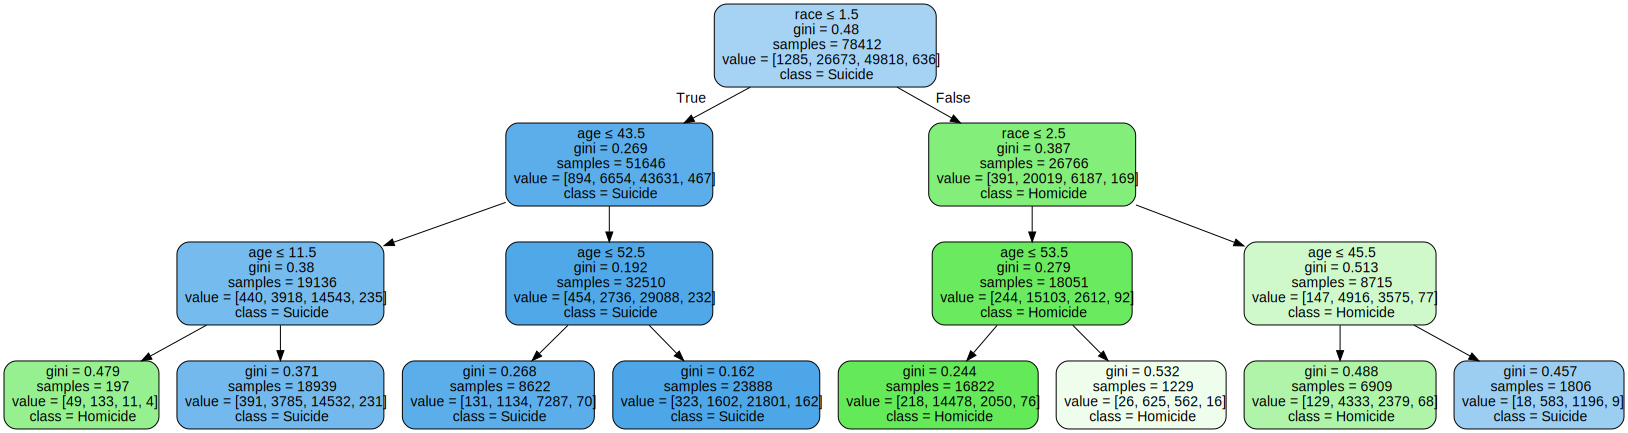

In [ ]:
from sklearn import tree
import graphviz
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dot_data = tree.export_graphviz(dt.fit(train_input, train_target), out_file = None,
                                feature_names=data.columns,
                                class_names=dt.classes_,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [ ]:
#save model
import joblib
#joblib.dump(dt, 'drive/MyDrive/DTree_model.pkl')
dt = joblib.load('drive/MyDrive/DTree_model.pkl')

In [ ]:
#pre-recall

from sklearn.metrics import precision_score, recall_score

train_pred = dt.predict(train_input)
test_pred = dt.predict(test_input)

train_precision = precision_score(train_target, train_pred, average='weighted', zero_division=0)
train_recall = recall_score(train_target, train_pred, average='weighted')

test_precision = precision_score(test_target, test_pred, average='weighted', zero_division=0)
test_recall = recall_score(test_target, test_pred, average='weighted')

print("Train Precision:", train_precision)
print("Train Recall:", train_recall)

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Train Precision: 0.7992641325879716
Train Recall: 0.8211115645564454
Test Precision: 0.8036860572195151
Test Recall: 0.8253328572157322


In [ ]:
#데이터 예측

new_Data=[40,2,1]#age, race, edu
pred=dt.predict([new_Data])
if(pred[0]=='Suicide'):
  print("Suicide case")
elif(pred[0]=='Homicide'):
  print("Homicide case")
elif(pred[0]=='Accidental'):
  print("Accidental case")
else:
  print("Undetermined case")

Homicide case


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#KNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

gun_death = pd.read_csv('drive/MyDrive/gun_deaths.csv')

gd_cleaned = gun_death.dropna().copy()

gd_cleaned['place'] = gd_cleaned['place'].map({'Home':1, 'Street':2, 'Other specified':3, 'Other unspecified':4, 'Industrial/construction':3, 'Farm':3, 'Trade/service area':3, 'School/instiution':3, 'Sports':3, 'Residential institution':3})
gd_cleaned['intent'] = gd_cleaned['intent'].map({'Accidental':1, 'Homicide':2, 'Suicide':3, 'Undetermined':4})
gd_cleaned['race'] = gd_cleaned['race'].map({'White': 1, 'Black': 2, 'Asian/Pacific Islander': 3, 'Native American/Native Alaskan': 4, 'Hispanic': 5})
gd_cleaned['education'] = gd_cleaned['education'].map({'BA+': 1, 'Less than HS': 2, 'HS/GED': 3, 'Some college': 4})

feature = gd_cleaned[['place', 'age', 'intent', 'education']]
place = gd_cleaned['race']

gd_cleaned.isnull().sum()


year         0
month        0
intent       0
police       0
sex          0
age          0
race         0
place        0
education    0
dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, place, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=12, weights='uniform')
knn.fit(X_train, Y_train)

knn.score(X_train, Y_train)

0.7810666734683467

In [ ]:
#pre-recall
from sklearn.metrics import precision_score, recall_score, classification_report

Y_pred = knn.predict(X_test)

precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')

print(classification_report(Y_test, Y_pred))

print("Weighted Precision:", precision)
print("Weighted Recall:", recall)

              precision    recall  f1-score   support

           1       0.84      0.92      0.88     12935
           2       0.62      0.71      0.66      4564
           3       0.00      0.00      0.00       259
           4       0.00      0.00      0.00       151
           5       0.31      0.02      0.04      1694

    accuracy                           0.78     19603
   macro avg       0.35      0.33      0.32     19603
weighted avg       0.72      0.78      0.74     19603

Weighted Precision: 0.7235114264100762
Weighted Recall: 0.7765137989083304


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [1]:
#예측

prediction = knn.predict(X_test)
knn.score(X_test, Y_test)

sample = np.array([[1,20,2,2],
                   [2,20,3,1],
                   [3,34,4,3],
                   [4,22,1,4]])#place, age, intent, edu
pred=knn.predict(sample)
pred
#1:w, 2:b

NameError: name 'knn' is not defined